# Problem Statement

# Required Liabraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import os
import re
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Data Gathering

In [2]:
df_train=pd.read_csv(r"C:\Users\Admin\Downloads\loan_sanction_train.csv")
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df_test=pd.read_csv(r"C:\Users\Admin\Downloads\loan_sanction_test.csv")
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [4]:
# df=pd.concat([df_train,df_test])
df=df_train

In [5]:
df.shape

(614, 13)

In [6]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [7]:
df.tail(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
col_list=list(df.columns)
col_list

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [9]:
con_list=[]
cat_list=[]
for i in col_list:
    if df[i].dtype=="object":
        cat_list.append(i)
    else:
        con_list.append(i)

In [10]:
# The length of categorical features=8
# The length of numerical features=5

In [11]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
df.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


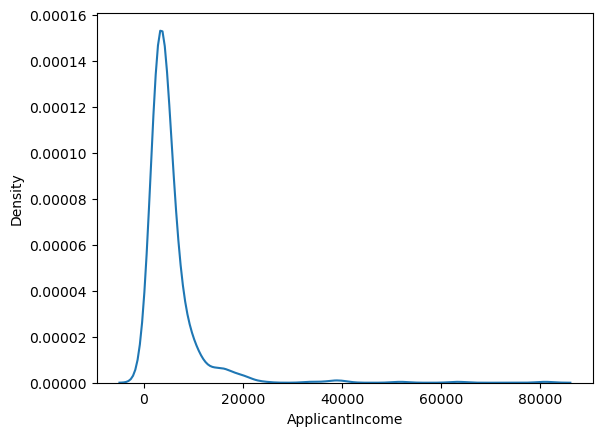

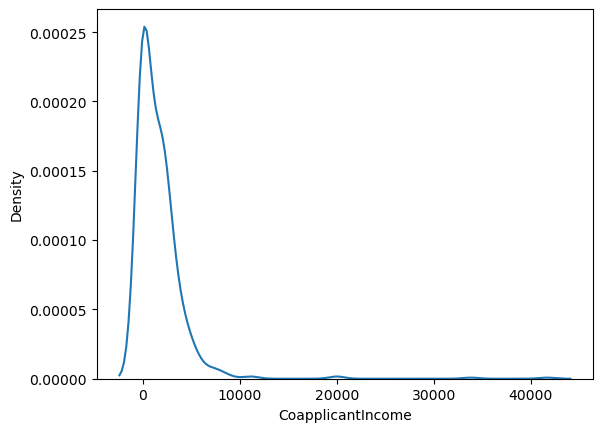

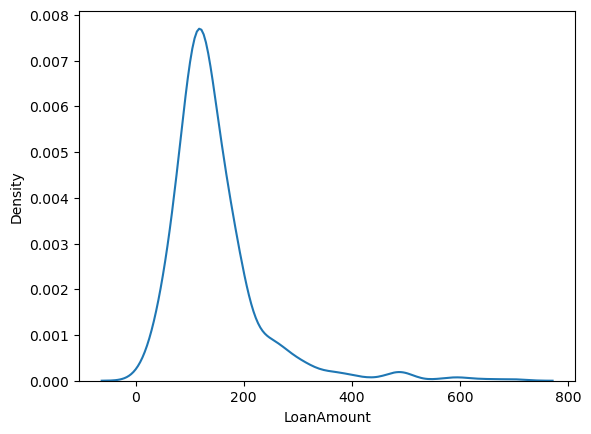

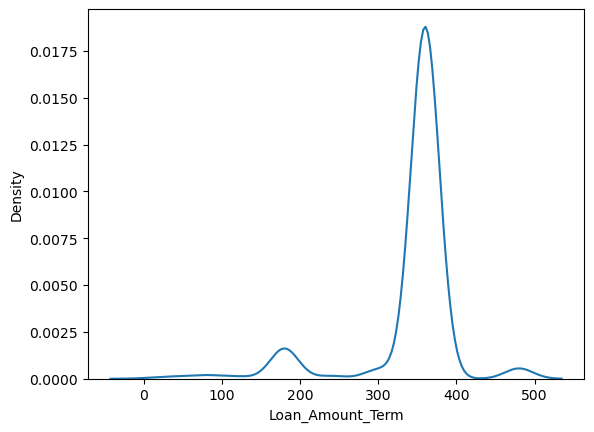

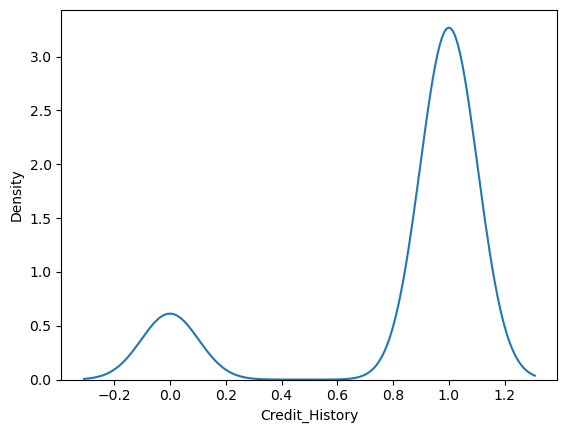

In [14]:
for i in con_list:
    sns.kdeplot(df[i])
    plt.show()

In [15]:
for i in cat_list:
    print(f"The unique values from column {df[i]}={df[i].unique()}")
    print(f"The nunique values from column {df[i]}={df[i].nunique()}")    
    print(f"The value count values from column {df[i]}={df[i].value_counts()}")    

The unique values from column 0      LP001002
1      LP001003
2      LP001005
3      LP001006
4      LP001008
         ...   
609    LP002978
610    LP002979
611    LP002983
612    LP002984
613    LP002990
Name: Loan_ID, Length: 614, dtype: object=['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP

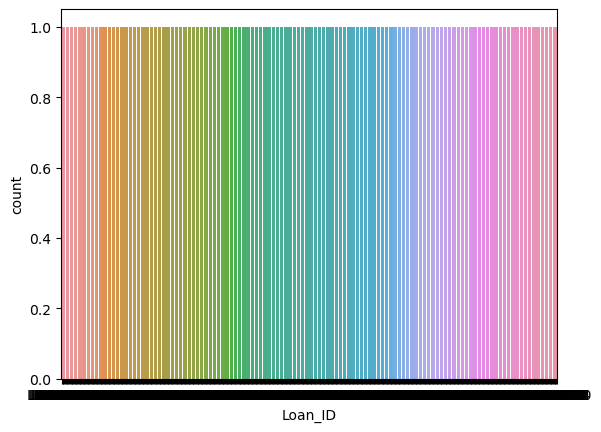

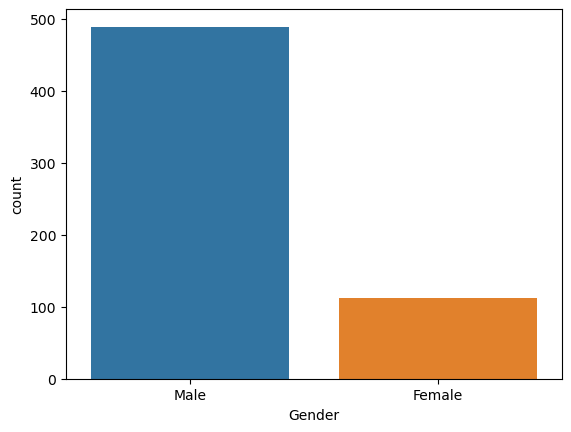

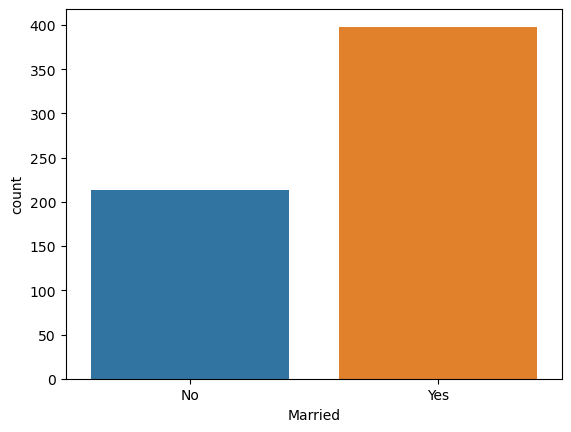

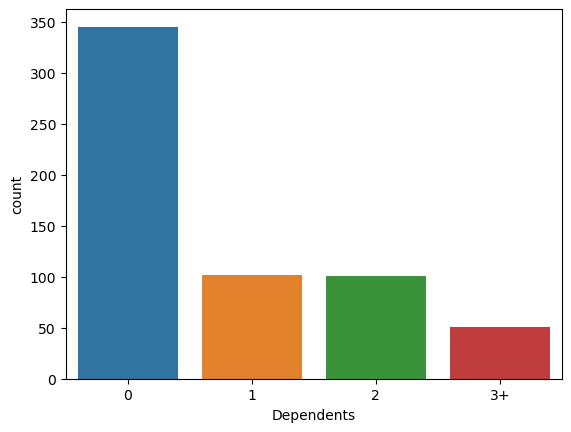

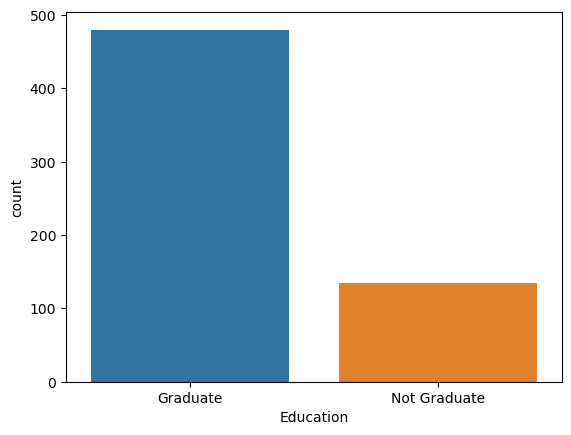

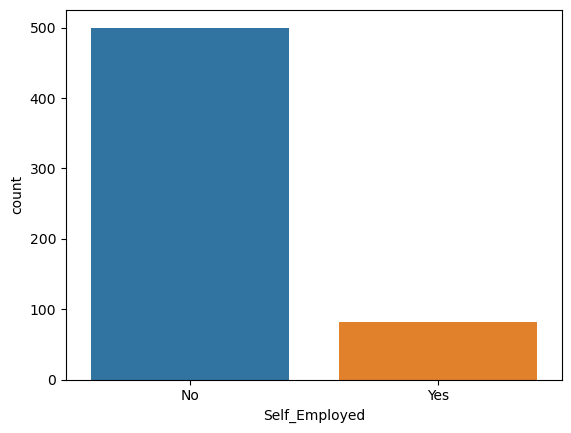

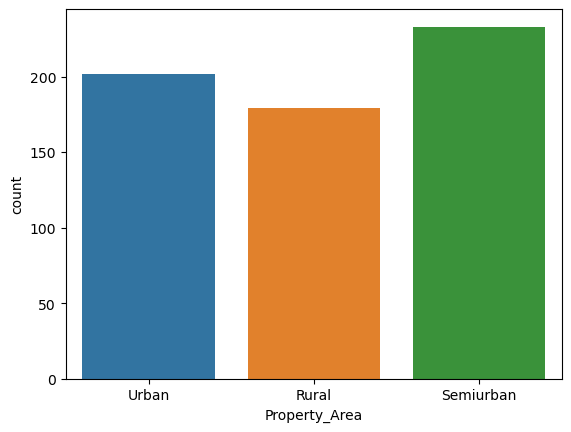

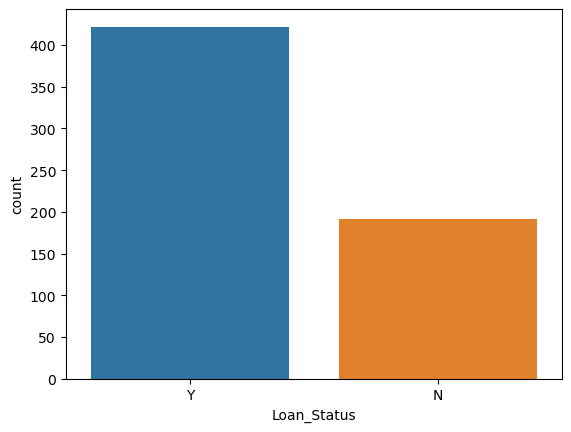

In [16]:
for i in cat_list:
    sns.countplot(x=df[i])
    plt.show()

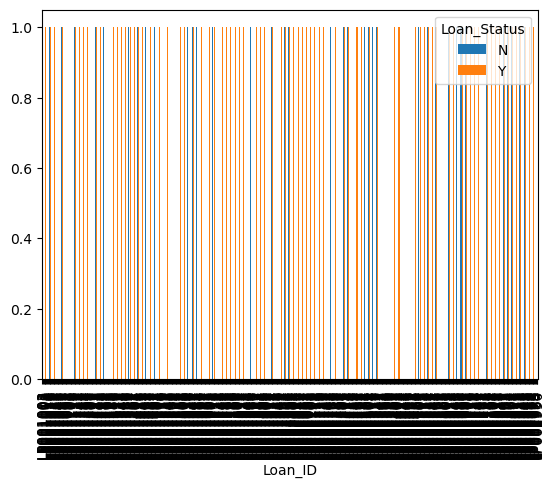

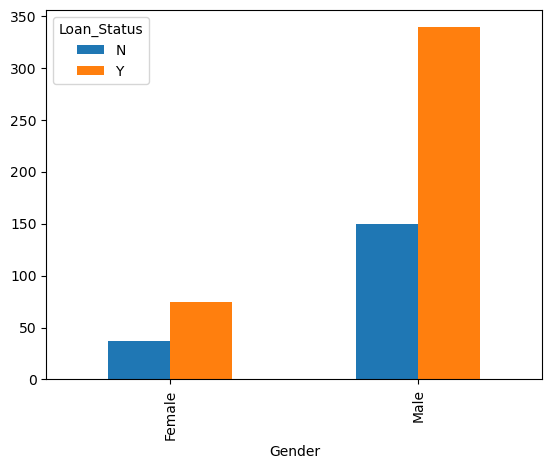

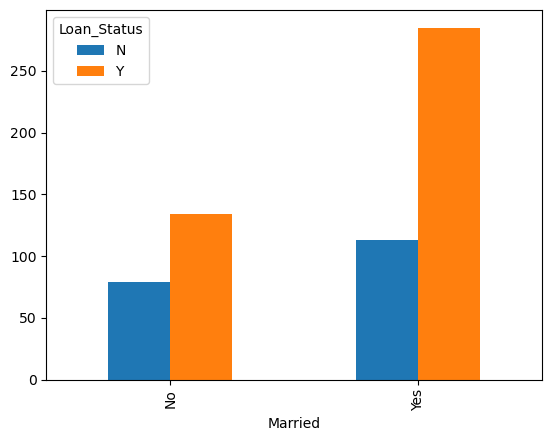

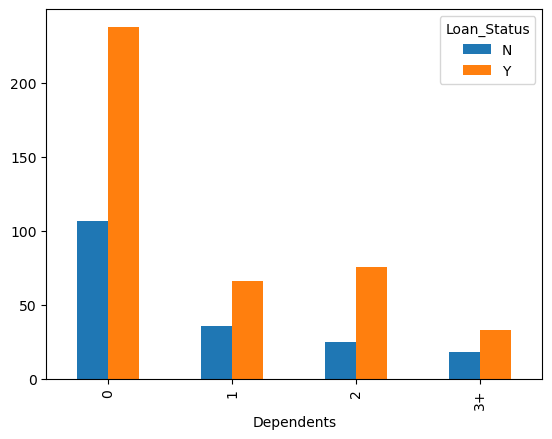

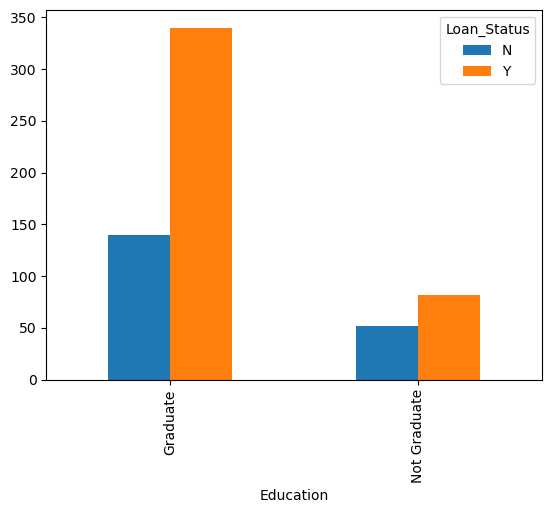

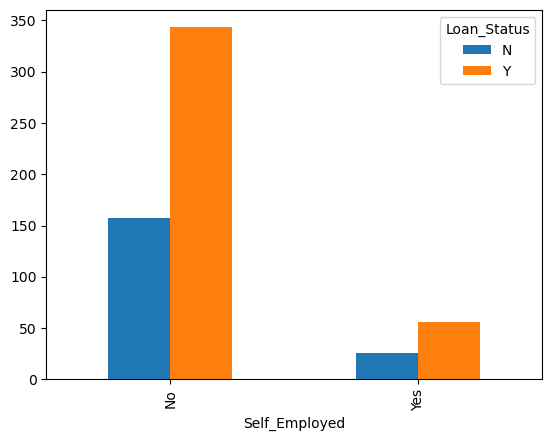

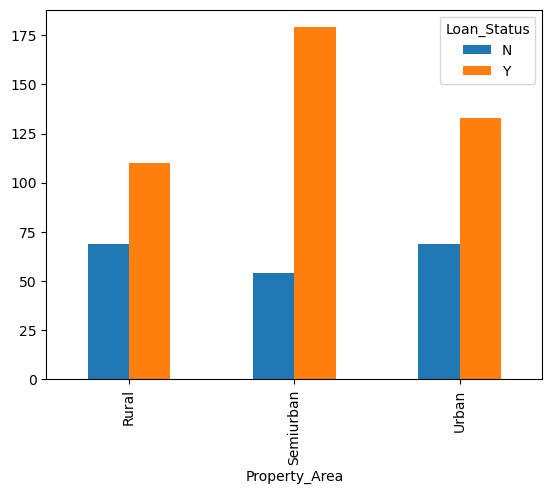

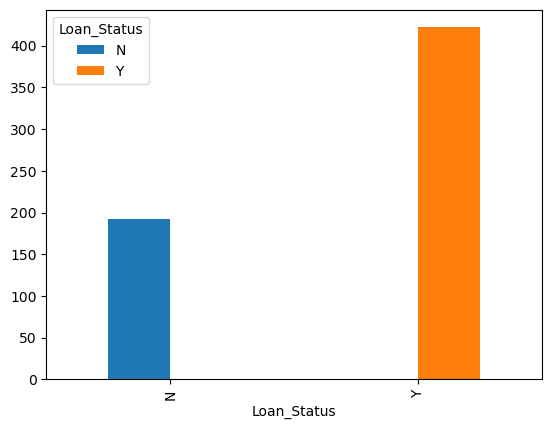

In [17]:
for i in cat_list:
    (pd.crosstab(df[i],df["Loan_Status"])).plot(kind="bar")
    plt.show()

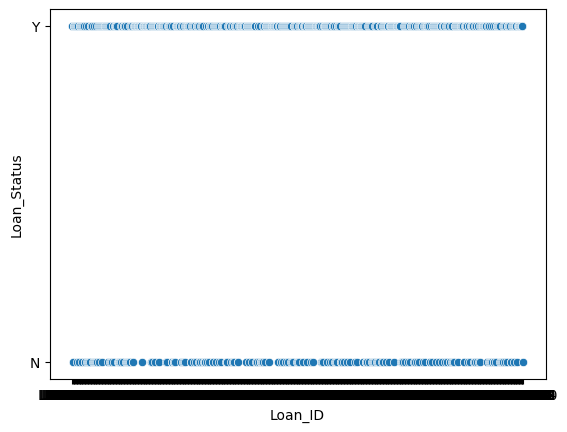

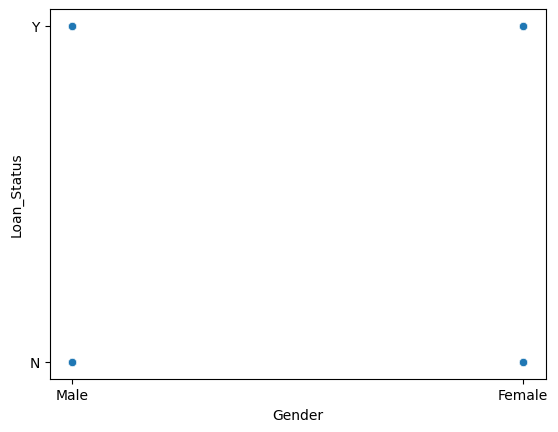

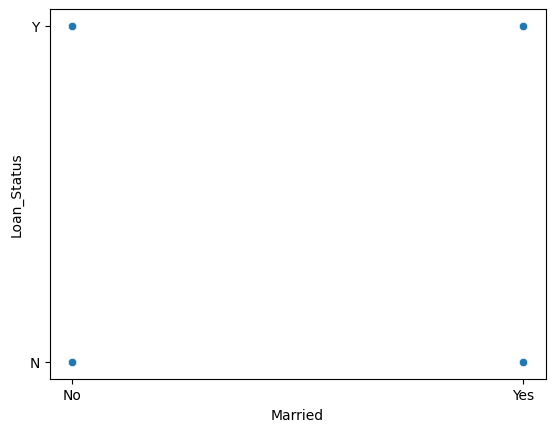

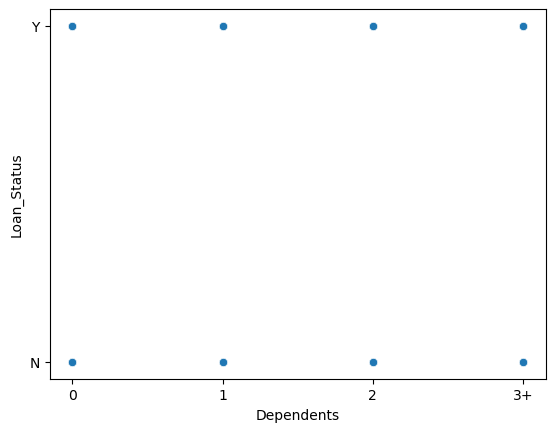

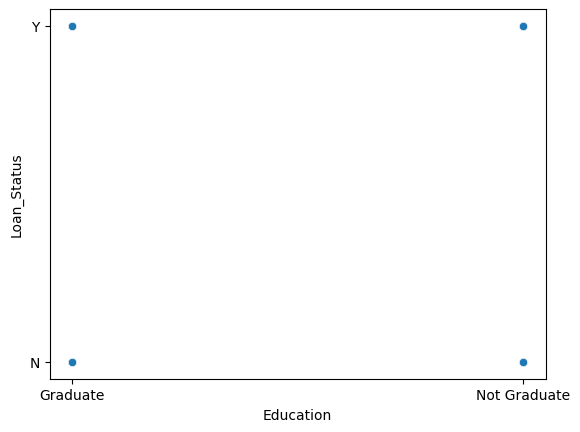

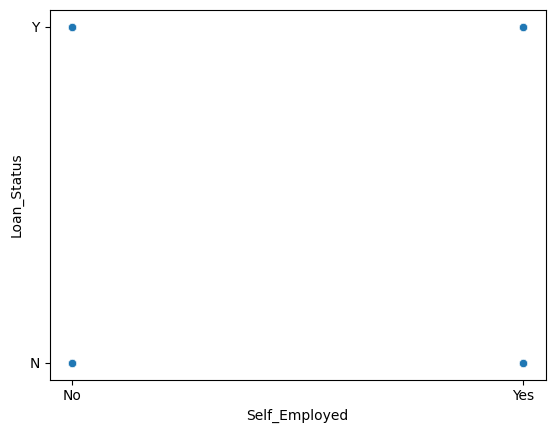

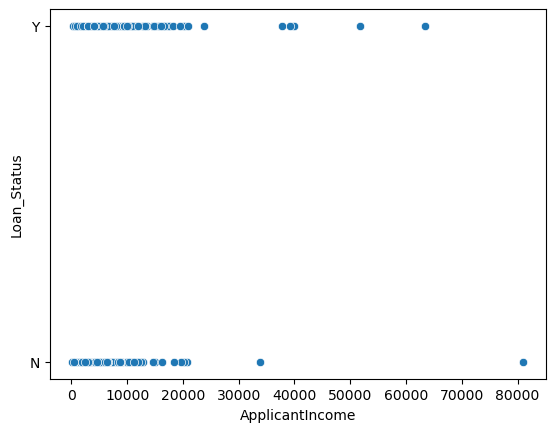

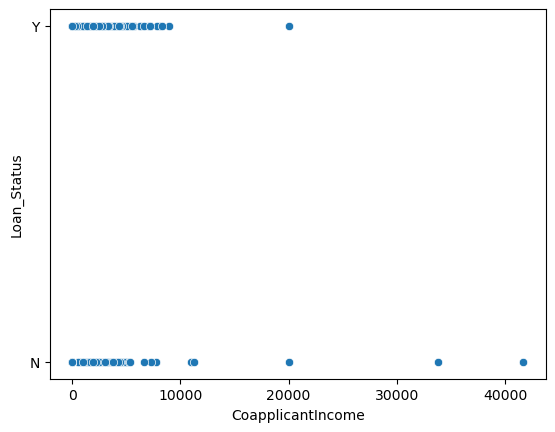

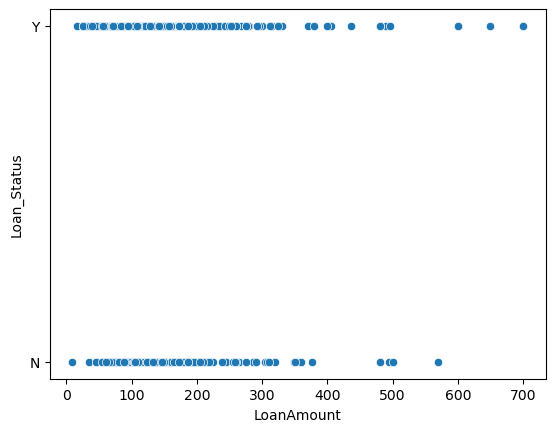

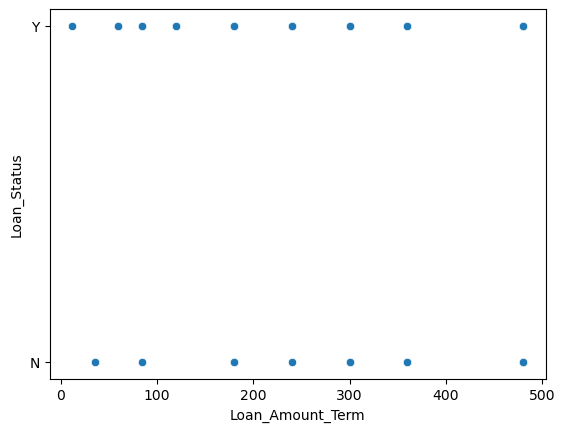

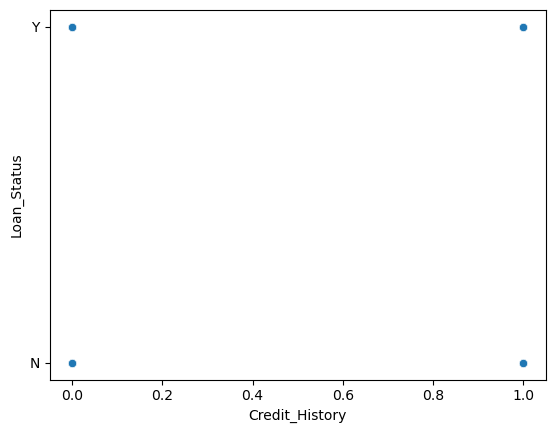

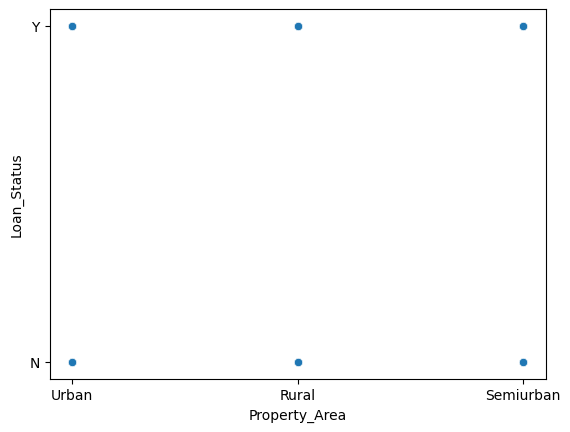

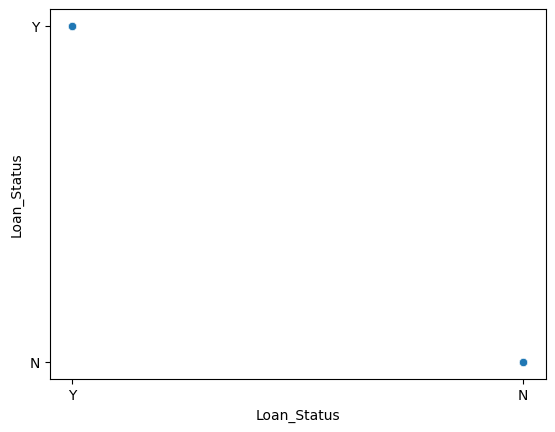

In [18]:
# Bivariate analysis
for i in col_list:
    sns.scatterplot(x=df[i],y=df["Loan_Status"])
    plt.show()

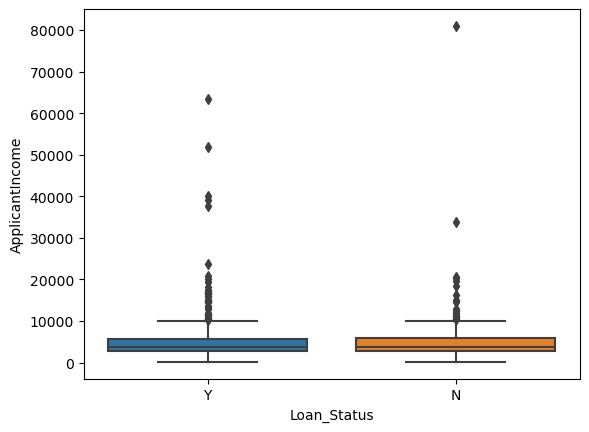

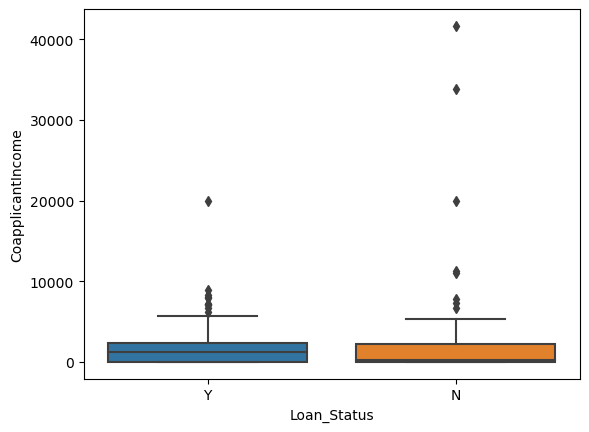

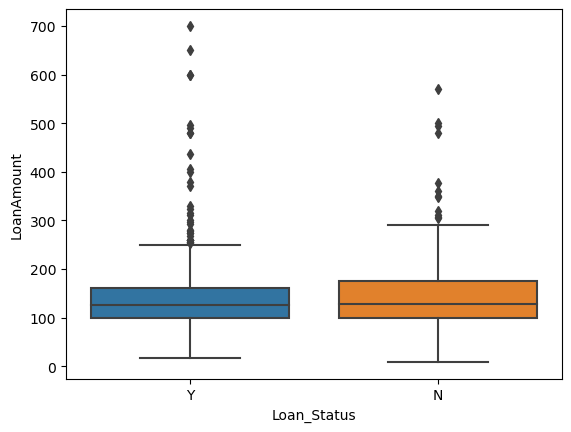

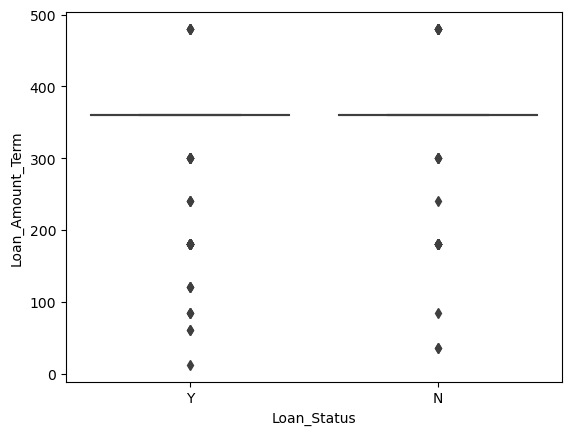

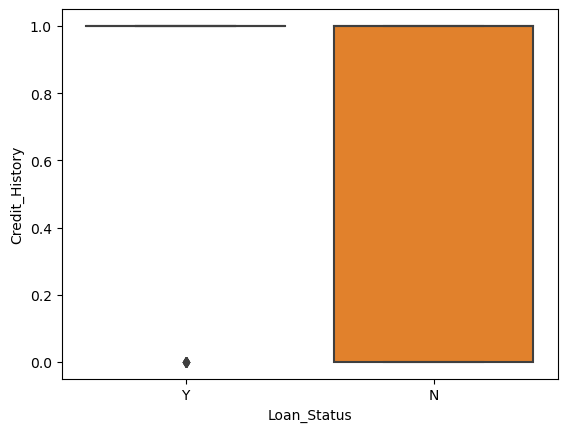

In [19]:
for i in con_list:
    sns.boxplot(df,y=i,x="Loan_Status")
    plt.show()

<AxesSubplot: >

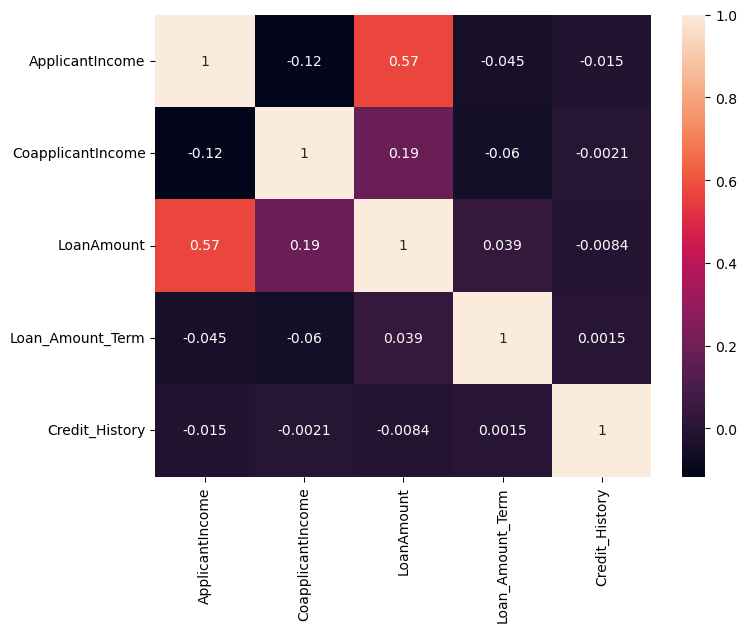

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

In [21]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


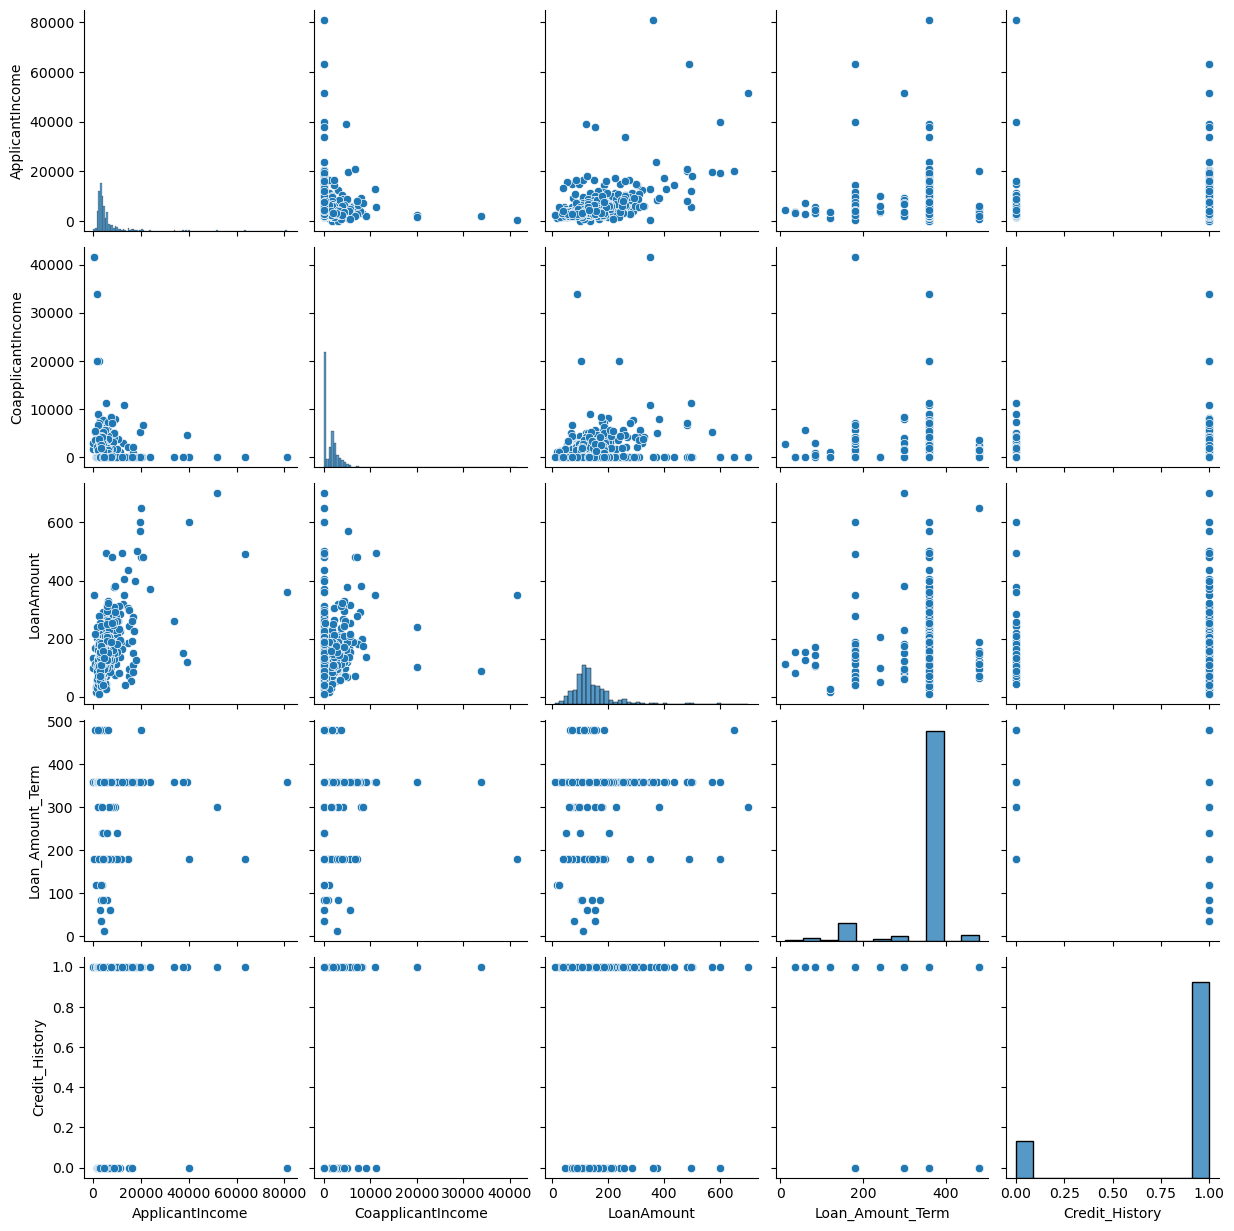

In [22]:
sns.pairplot(df)

# Data Preprocessing

In [23]:
df["Gender"].replace({"Female":0,"Male":1},inplace=True)
df["Married"].replace({"No":0,"Yes":1},inplace=True)
df["Dependents"].replace({"0":0,"1":1,"2":2,"3+":3},inplace=True)
df["Education"].replace({"Not Graduate":0,"Graduate":1},inplace=True)
df["Self_Employed"].replace({"No":0,"Yes":1},inplace=True)
df["Loan_Status"].replace({"N":0,"Y":1},inplace=True)

In [24]:
df=pd.get_dummies(df,columns=["Property_Area"])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,0,0,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,1


In [25]:
df.drop("Loan_ID",axis=1,inplace=True)

In [26]:
df.describe(include="all")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,601.000000,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000,614.000000,614.000000
mean,0.813644,0.651391,0.762938,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296,0.291531,0.379479,0.328990
std,0.389718,0.476920,1.015216,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973,0.454838,0.485653,0.470229
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
df.isna().sum()

Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Loan_Status                 0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [28]:
from sklearn.impute import KNNImputer

In [29]:
impute=KNNImputer(n_neighbors=5)
new=impute.fit_transform(df)
new_df=pd.DataFrame(new,columns=df.columns)
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,147.8,360.0,1.0,1.0,0.0,0.0,1.0
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,1.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,1.0,0.0,0.0,1.0


In [30]:
new_df.isna().sum()

Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [31]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,601.000000,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000,614.000000,614.000000
mean,0.813644,0.651391,0.762938,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296,0.291531,0.379479,0.328990
std,0.389718,0.476920,1.015216,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973,0.454838,0.485653,0.470229
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000,1.000000,1.000000,1.000000


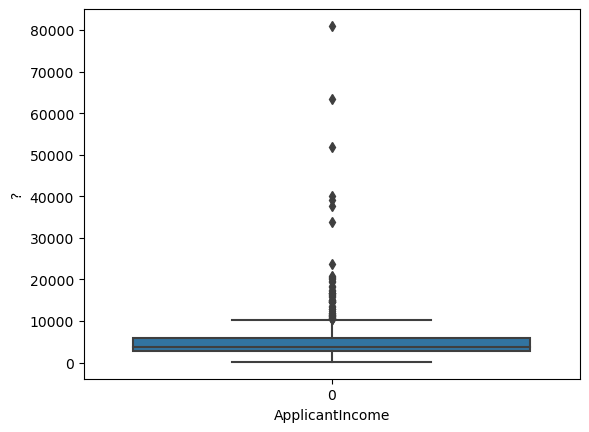

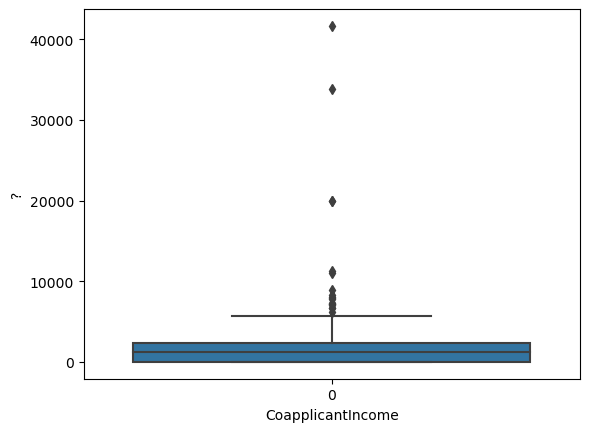

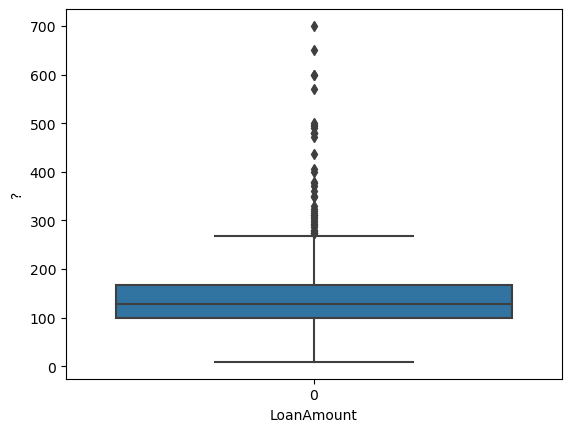

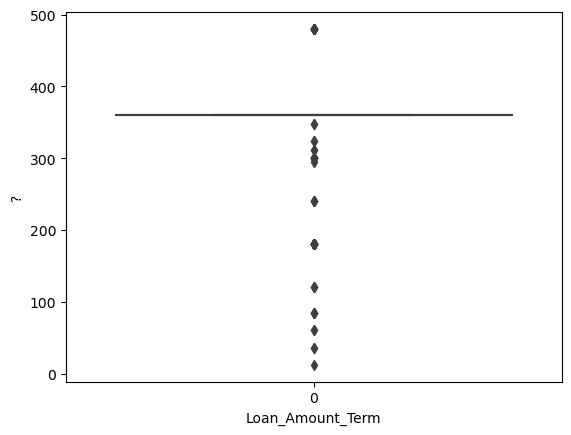

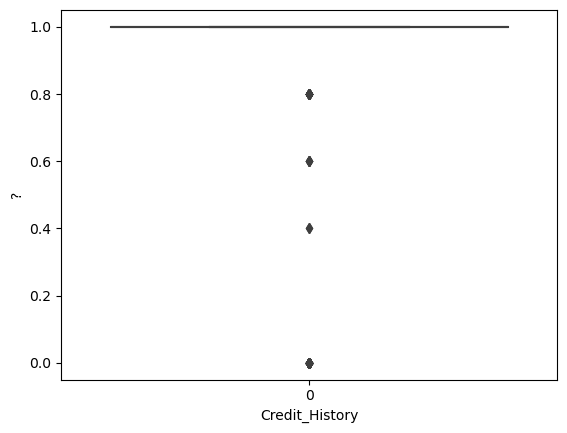

In [32]:
for i in con_list:
    sns.boxplot(new_df[i])
    plt.xlabel(i)
    plt.ylabel("?")
    plt.show()

# Feature Selection

In [33]:
X=new_df.drop("Loan_Status",axis=1)
y=new_df["Loan_Status"]

In [34]:
from sklearn.feature_selection import chi2,f_classif,mutual_info_classif,VarianceThreshold

<AxesSubplot: >

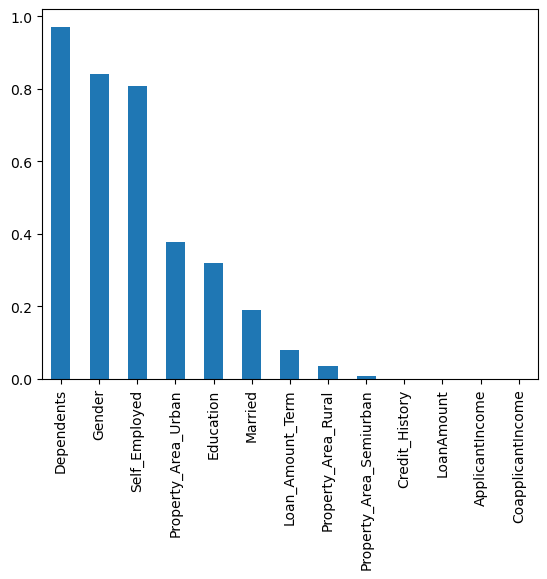

In [35]:
stats,chi=chi2(X,y)
s1=pd.Series(chi,index=X.columns)
s1.sort_values(ascending=False).plot(kind="bar")

<AxesSubplot: >

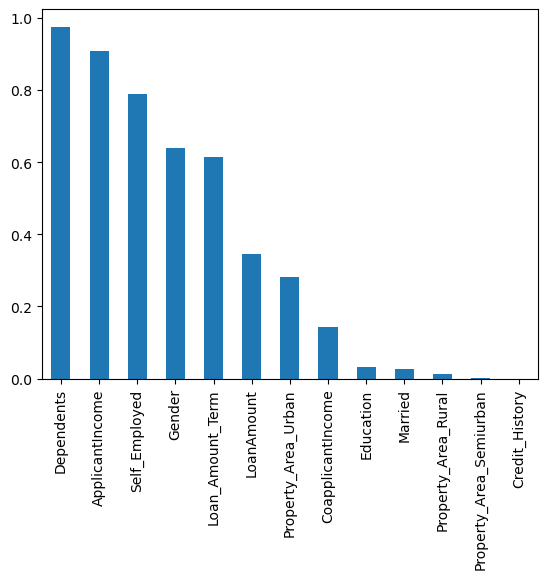

In [36]:
stats,anova=f_classif(X,y)
s2=pd.Series(anova,index=X.columns)
s2.sort_values(ascending=False).plot(kind="bar")

<AxesSubplot: >

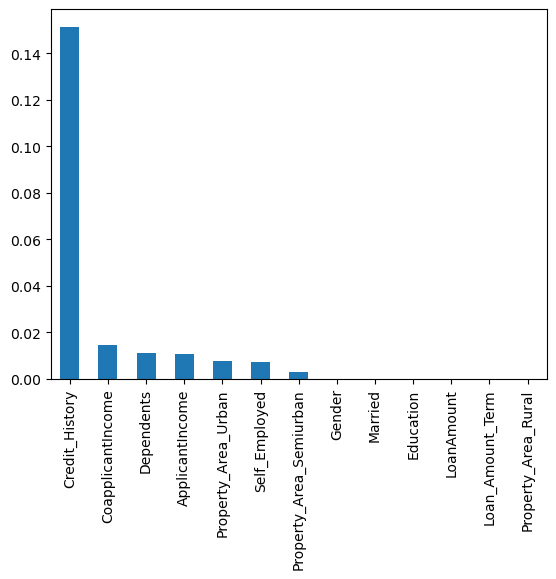

In [37]:
info=mutual_info_classif(X,y)
s3=pd.Series(info,index=X.columns)
s3.sort_values(ascending=False).plot(kind="bar")

In [38]:
v_th=VarianceThreshold(threshold=0.1)
thesh_trans=v_th.fit_transform(X,y)
v_th.get_feature_names_out()

array(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'], dtype=object)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

<AxesSubplot: >

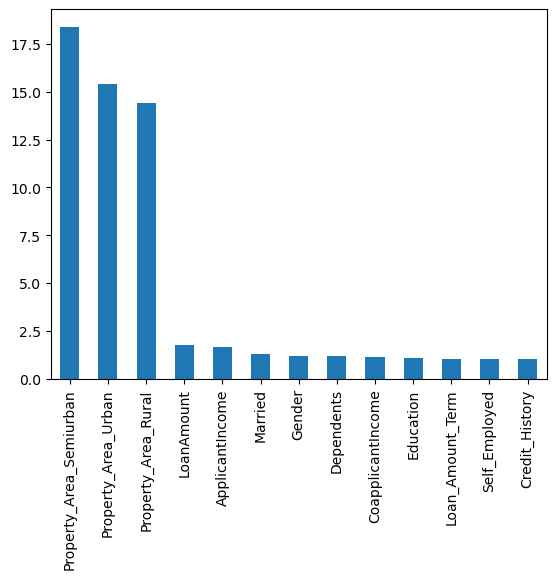

In [40]:
vif=[variance_inflation_factor(X.values,index) for index in range(len(X.columns))]
s4=pd.Series(vif,index=X.columns)
s4.sort_values(ascending=False).plot(kind="bar")

In [41]:
# Checking Categorical Data 
y.value_counts()     # As our data is imbalaced so we need to do SMOTE on data to make it balance

1.0    422
0.0    192
Name: Loan_Status, dtype: int64

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
sm=SMOTE(sampling_strategy=0.90,k_neighbors=5)
X_sm,y_sm=sm.fit_resample(X,y)
X_sm.shape,y_sm.shape

((801, 13), (801,))

# feature Scaling

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.25)

In [45]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((600, 13), (201, 13), (600,), (201,))

In [46]:
std=StandardScaler()
std_train=std.fit_transform(X_train)
std_test=std.transform(X_test)
df_train=pd.DataFrame(std_train,columns=X_train.columns)
df_test=pd.DataFrame(std_test,columns=X_test.columns)

In [47]:
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.497175,0.826340,0.276906,0.583075,-0.415087,0.106263,1.263053,1.945189,0.283088,0.561003,-0.710991,-0.747316,1.475244
1,0.497175,-1.292164,-0.774464,0.583075,-0.415087,0.015611,-0.529671,0.233677,0.283088,0.561003,-0.710991,-0.747316,1.475244
2,-2.180268,-1.292164,1.328276,0.583075,-0.415087,-0.319701,-0.529671,-0.115611,0.283088,0.561003,-0.710991,-0.747316,1.475244
3,0.497175,0.826340,-0.774464,0.583075,-0.415087,2.427326,1.148637,4.914138,0.283088,0.561003,1.508091,-0.747316,-0.733498
4,0.497175,0.826340,2.379646,0.583075,2.589198,-0.009833,0.035714,0.454893,0.283088,0.561003,-0.710991,1.403155,-0.733498
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.334335,0.826340,-0.774464,-1.856070,-0.415087,-0.590271,0.411287,-0.579354,0.283088,-2.043081,-0.710991,-0.616526,1.340910
596,0.004703,0.656159,-0.690007,0.583075,-0.415087,-0.377329,0.168961,-0.162279,0.054473,-2.043081,-0.710991,1.230406,-0.556068
597,0.497175,0.826340,-0.774464,0.583075,-0.415087,-0.592331,0.065672,-0.674472,0.283088,0.561003,-0.710991,-0.747316,1.475244
598,0.497175,-1.292164,0.276906,-1.856070,2.589198,-0.430573,-0.038226,0.489821,0.283088,0.040186,-0.710991,1.403155,-0.733498


In [48]:
df_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.497175,0.500607,-0.774464,-1.856070,-0.415087,0.128700,-0.529671,0.631436,0.283088,-2.043081,1.508091,-0.747316,-0.733498
1,-2.180268,-1.292164,-0.774464,0.583075,-0.415087,0.856585,-0.529671,1.293184,0.283088,0.561003,-0.710991,-0.747316,1.475244
2,0.497175,0.826340,-0.774464,0.583075,0.185770,0.071046,-0.529671,1.246612,0.283088,0.561003,-0.710991,-0.747316,1.475244
3,0.497175,-1.036985,-0.774464,0.289274,-0.415087,-0.268889,0.959769,0.293162,0.191675,0.247335,-0.443698,-0.747316,1.209196
4,0.497175,0.826340,0.276906,0.583075,-0.415087,-0.596881,0.181682,-0.476542,0.283088,0.561003,1.508091,-0.747316,-0.733498
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.497175,0.826340,2.379646,0.583075,-0.415087,-0.106719,-0.529671,-0.558043,0.283088,0.561003,-0.710991,1.403155,-0.733498
197,0.497175,0.826340,-0.774464,0.583075,-0.415087,0.041054,0.152998,0.315177,0.283088,0.561003,1.508091,-0.747316,-0.733498
198,0.497175,0.826340,2.379646,0.583075,-0.415087,0.704263,-0.529671,1.479471,0.283088,0.561003,1.508091,-0.747316,-0.733498
199,0.497175,0.826340,1.328276,0.583075,-0.415087,-0.256851,0.617672,0.792538,0.283088,-2.043081,-0.710991,-0.747316,1.475244


# Model Training

In [49]:
log_rg=LogisticRegression()
log_rg.fit(df_train,y_train)

LogisticRegression()

In [50]:
def evaluat(model,X_val,y_val):
    pred=model.predict(X_val)
    cm=confusion_matrix(y_val,pred)
    print(f"{cm=}")
    clf=classification_report(y_val,pred)
    print(f"{clf=}")
    acc=accuracy_score(y_val,pred)
    print(f"{acc=}")
    

In [51]:
evaluat(log_rg,df_train,y_train)

cm=array([[160, 118],
       [ 33, 289]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n         0.0       0.83      0.58      0.68       278\n         1.0       0.71      0.90      0.79       322\n\n    accuracy                           0.75       600\n   macro avg       0.77      0.74      0.74       600\nweighted avg       0.77      0.75      0.74       600\n'
acc=0.7483333333333333


In [52]:
evaluat(log_rg,df_test,y_test)

cm=array([[66, 35],
       [ 8, 92]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n         0.0       0.89      0.65      0.75       101\n         1.0       0.72      0.92      0.81       100\n\n    accuracy                           0.79       201\n   macro avg       0.81      0.79      0.78       201\nweighted avg       0.81      0.79      0.78       201\n'
acc=0.7860696517412935


In [53]:
# Our Logistic Regression model giving accuracy with low variance but high bias which is underfitted model

In [54]:
# (C=1.0,n_jobs=-1,random_state=73)"max_iter":200,"n_jobs":-1,,"random_state":34


In [55]:
params={"C":np.arange(0,1,0.01)}
params

{'C': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99])}

In [56]:
rscv=RandomizedSearchCV(log_rg,params,cv=5)
rscv.fit(df_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])})

In [57]:
rscv.best_estimator_

LogisticRegression(C=0.21)

In [58]:
log_rg_hyp=LogisticRegression(C=0.62)
log_rg_hyp.fit(df_train,y_train)

LogisticRegression(C=0.62)

In [59]:
evaluat(log_rg_hyp,df_train,y_train)

cm=array([[160, 118],
       [ 33, 289]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n         0.0       0.83      0.58      0.68       278\n         1.0       0.71      0.90      0.79       322\n\n    accuracy                           0.75       600\n   macro avg       0.77      0.74      0.74       600\nweighted avg       0.77      0.75      0.74       600\n'
acc=0.7483333333333333


In [60]:
evaluat(log_rg_hyp,df_test,y_test)

cm=array([[66, 35],
       [ 8, 92]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n         0.0       0.89      0.65      0.75       101\n         1.0       0.72      0.92      0.81       100\n\n    accuracy                           0.79       201\n   macro avg       0.81      0.79      0.78       201\nweighted avg       0.81      0.79      0.78       201\n'
acc=0.7860696517412935


In [61]:
# Knn

In [62]:
knn=KNeighborsClassifier()
knn.fit(df_train,y_train)

KNeighborsClassifier()

In [63]:
evaluat(knn,df_train,y_train)

cm=array([[216,  62],
       [ 33, 289]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n         0.0       0.87      0.78      0.82       278\n         1.0       0.82      0.90      0.86       322\n\n    accuracy                           0.84       600\n   macro avg       0.85      0.84      0.84       600\nweighted avg       0.84      0.84      0.84       600\n'
acc=0.8416666666666667


In [64]:
evaluat(knn,df_test,y_test)

cm=array([[73, 28],
       [16, 84]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n         0.0       0.82      0.72      0.77       101\n         1.0       0.75      0.84      0.79       100\n\n    accuracy                           0.78       201\n   macro avg       0.79      0.78      0.78       201\nweighted avg       0.79      0.78      0.78       201\n'
acc=0.7810945273631841


In [65]:
# Hyperparameter_tuning

In [66]:
params={"n_neighbors":np.arange(6,20),"p":[1,2]}
params

{'n_neighbors': array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 'p': [1, 2]}

In [67]:
rscv=RandomizedSearchCV(knn,params,cv=5)
rscv.fit(df_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'p': [1, 2]})

In [68]:
rscv.best_estimator_

KNeighborsClassifier(n_neighbors=14, p=1)

In [69]:
rscv.best_params_

{'p': 1, 'n_neighbors': 14}

In [70]:
knn_hyp=KNeighborsClassifier(n_neighbors=12,p=2)
knn_hyp.fit(df_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [71]:
evaluat(knn_hyp,df_train,y_train)

cm=array([[183,  95],
       [ 40, 282]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n         0.0       0.82      0.66      0.73       278\n         1.0       0.75      0.88      0.81       322\n\n    accuracy                           0.78       600\n   macro avg       0.78      0.77      0.77       600\nweighted avg       0.78      0.78      0.77       600\n'
acc=0.775


In [72]:
evaluat(knn_hyp,df_test,y_test)

cm=array([[70, 31],
       [14, 86]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n         0.0       0.83      0.69      0.76       101\n         1.0       0.74      0.86      0.79       100\n\n    accuracy                           0.78       201\n   macro avg       0.78      0.78      0.77       201\nweighted avg       0.78      0.78      0.77       201\n'
acc=0.7761194029850746


In [73]:
# Dtree
dtree=DecisionTreeClassifier(random_state=74)
dtree.fit(df_train,y_train)

DecisionTreeClassifier(random_state=74)

In [74]:
evaluat(dtree,df_train,y_train)

cm=array([[278,   0],
       [  0, 322]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00       278\n         1.0       1.00      1.00      1.00       322\n\n    accuracy                           1.00       600\n   macro avg       1.00      1.00      1.00       600\nweighted avg       1.00      1.00      1.00       600\n'
acc=1.0


In [75]:
evaluat(dtree,df_test,y_test)

cm=array([[79, 22],
       [33, 67]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n         0.0       0.71      0.78      0.74       101\n         1.0       0.75      0.67      0.71       100\n\n    accuracy                           0.73       201\n   macro avg       0.73      0.73      0.73       201\nweighted avg       0.73      0.73      0.73       201\n'
acc=0.7263681592039801


In [76]:
# Hyperparameter tuning
params={"criterion":["entropy","gini"],"min_samples_leaf":np.arange(1,10),"min_samples_split":np.arange(1,10),"max_depth":np.arange(1,15)}
params

{'criterion': ['entropy', 'gini'],
 'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}

In [77]:
rscv=RandomizedSearchCV(dtree,params,cv=5)
rscv.fit(df_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=74),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [78]:
rscv.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_depth': 5,
 'criterion': 'gini'}

In [79]:
rscv.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=6, min_samples_split=5,
                       random_state=74)

In [80]:
dtree_hyp=DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=7,
                       random_state=74)
dtree_hyp.fit(df_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=7,
                       random_state=74)

In [81]:
evaluat(dtree_hyp,df_train,y_train)

cm=array([[178, 100],
       [ 14, 308]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n         0.0       0.93      0.64      0.76       278\n         1.0       0.75      0.96      0.84       322\n\n    accuracy                           0.81       600\n   macro avg       0.84      0.80      0.80       600\nweighted avg       0.83      0.81      0.80       600\n'
acc=0.81


In [82]:
evaluat(dtree_hyp,df_test,y_test)

cm=array([[71, 30],
       [ 5, 95]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n         0.0       0.93      0.70      0.80       101\n         1.0       0.76      0.95      0.84       100\n\n    accuracy                           0.83       201\n   macro avg       0.85      0.83      0.82       201\nweighted avg       0.85      0.83      0.82       201\n'
acc=0.8258706467661692


In [83]:
# Random_forest

In [84]:
ranf=RandomForestClassifier(random_state=94)
ranf.fit(df_train,y_train)

RandomForestClassifier(random_state=94)

In [85]:
evaluat(ranf,df_train,y_train)

cm=array([[278,   0],
       [  0, 322]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n         0.0       1.00      1.00      1.00       278\n         1.0       1.00      1.00      1.00       322\n\n    accuracy                           1.00       600\n   macro avg       1.00      1.00      1.00       600\nweighted avg       1.00      1.00      1.00       600\n'
acc=1.0


In [86]:
evaluat(ranf,df_test,y_test)

cm=array([[79, 22],
       [10, 90]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n         0.0       0.89      0.78      0.83       101\n         1.0       0.80      0.90      0.85       100\n\n    accuracy                           0.84       201\n   macro avg       0.85      0.84      0.84       201\nweighted avg       0.85      0.84      0.84       201\n'
acc=0.8407960199004975


In [87]:
# Hyperparameter tuning
params={"n_estimators":np.arange(5,200,5),"min_samples_split":np.arange(2,10),"min_samples_leaf":np.arange(1,10),"max_depth":np.arange(5,15)}
params

{'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
         70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
        135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195]),
 'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
 'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}

In [88]:
rscv=RandomizedSearchCV(ranf,params,cv=5)
rscv.fit(df_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=94),
                   param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195])})

In [89]:
rscv.best_estimator_

RandomForestClassifier(max_depth=11, min_samples_leaf=2, min_samples_split=9,
                       n_estimators=195, random_state=94)

In [90]:
ranf_hyp=RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=135, random_state=94)
ranf_hyp.fit(df_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=135, random_state=94)

In [91]:
evaluat(ranf_hyp,df_train,y_train)

cm=array([[206,  72],
       [ 11, 311]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n         0.0       0.95      0.74      0.83       278\n         1.0       0.81      0.97      0.88       322\n\n    accuracy                           0.86       600\n   macro avg       0.88      0.85      0.86       600\nweighted avg       0.88      0.86      0.86       600\n'
acc=0.8616666666666667


In [92]:
evaluat(ranf_hyp,df_test,y_test)

cm=array([[75, 26],
       [ 3, 97]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n         0.0       0.96      0.74      0.84       101\n         1.0       0.79      0.97      0.87       100\n\n    accuracy                           0.86       201\n   macro avg       0.88      0.86      0.85       201\nweighted avg       0.88      0.86      0.85       201\n'
acc=0.8557213930348259


In [93]:
ada=AdaBoostClassifier(random_state=37)
ada.fit(df_train,y_train)

AdaBoostClassifier(random_state=37)

In [94]:
evaluat(ada,df_train,y_train)

cm=array([[220,  58],
       [ 20, 302]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n         0.0       0.92      0.79      0.85       278\n         1.0       0.84      0.94      0.89       322\n\n    accuracy                           0.87       600\n   macro avg       0.88      0.86      0.87       600\nweighted avg       0.87      0.87      0.87       600\n'
acc=0.87


In [95]:
evaluat(ada,df_test,y_test)

cm=array([[78, 23],
       [10, 90]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n         0.0       0.89      0.77      0.83       101\n         1.0       0.80      0.90      0.85       100\n\n    accuracy                           0.84       201\n   macro avg       0.84      0.84      0.84       201\nweighted avg       0.84      0.84      0.84       201\n'
acc=0.835820895522388


In [96]:
params={"n_estimators":np.arange(5,250,10),"learning_rate":np.arange(0,1,0.05)}
params

{'n_estimators': array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
        135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245]),
 'learning_rate': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])}

In [97]:
rscv=RandomizedSearchCV(ada,params,cv=5)
rscv.fit(df_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=37),
                   param_distributions={'learning_rate': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                                        'n_estimators': array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
       135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245])})

In [98]:
rscv.best_estimator_

AdaBoostClassifier(learning_rate=0.45, n_estimators=125, random_state=37)

In [99]:
rscv.best_params_

{'n_estimators': 125, 'learning_rate': 0.45}

In [100]:
ada_hyp=AdaBoostClassifier(learning_rate=0.25, n_estimators=75, random_state=37)
ada_hyp.fit(df_train,y_train)

AdaBoostClassifier(learning_rate=0.25, n_estimators=75, random_state=37)

In [101]:
evaluat(ada_hyp,df_train,y_train)

cm=array([[202,  76],
       [ 17, 305]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n         0.0       0.92      0.73      0.81       278\n         1.0       0.80      0.95      0.87       322\n\n    accuracy                           0.84       600\n   macro avg       0.86      0.84      0.84       600\nweighted avg       0.86      0.84      0.84       600\n'
acc=0.845


In [102]:
evaluat(ada_hyp,df_test,y_test)

cm=array([[73, 28],
       [ 6, 94]], dtype=int64)
clf='              precision    recall  f1-score   support\n\n         0.0       0.92      0.72      0.81       101\n         1.0       0.77      0.94      0.85       100\n\n    accuracy                           0.83       201\n   macro avg       0.85      0.83      0.83       201\nweighted avg       0.85      0.83      0.83       201\n'
acc=0.8308457711442786


In [103]:
import pickle,json

In [104]:
with open("Model.pickle","wb")as f:
    pickle.dump(dtree_hyp,f)

In [105]:
with open("Backup_Model.pickle","wb")as f:
    pickle.dump(ada_hyp,f)

In [106]:
col_names=list(df_train.columns)
col_list={"columns":col_names}

In [107]:
with open("Column.json","w")as f:
    json.dump(col_list,f)

In [108]:
with open("Std_scale.pickle","wb")as f:
    pickle.dump(std,f)